In [4]:
import csv

import matplotlib.pyplot as plt
import numpy as np

In [6]:
V_ds, I_ds, V_gs = [], [], []

with open("Book1.csv", 'r') as fp:
    mosfet_data = csv.reader(fp)
    next(mosfet_data)
    for row in mosfet_data:
        V_ds.append(float(row[0]))
        I_ds.append(float(row[1]))
        V_gs.append(float(row[2]))

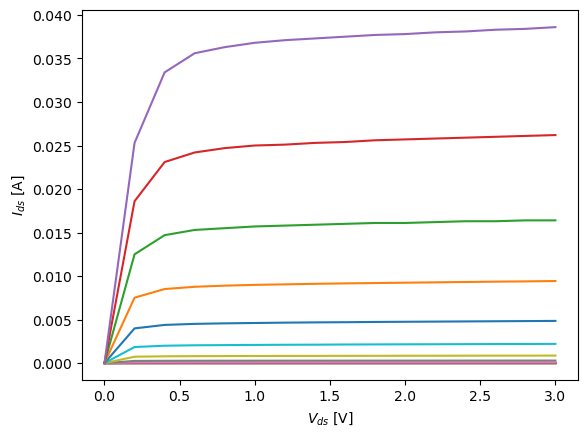

In [7]:
V_ds_folded = np.reshape(V_ds, (15, -1))
I_ds_folded = np.reshape(I_ds, (15, -1))
for vds, ids in zip(V_ds_folded, I_ds_folded):
    plt.plot(vds, ids)
plt.xlabel(r"$V_{ds}$ [V]")
plt.ylabel(r"$I_{ds}$ [A]")
plt.show()

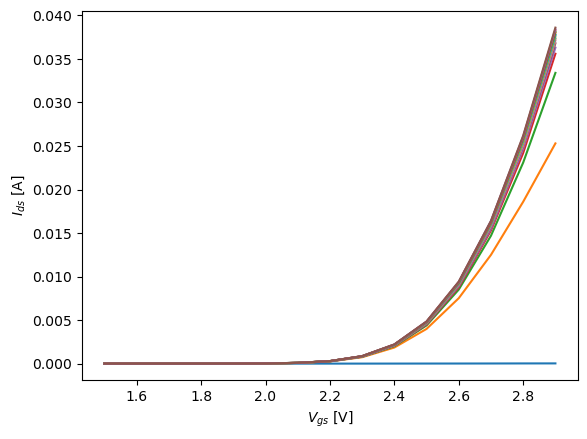

In [8]:
V_gs_I_ds_curves = {i: ([], []) for i in V_ds_folded[0]}
for i, vds in enumerate(V_ds):
    V_gs_I_ds_curves[vds][0].append(V_gs[i])
    V_gs_I_ds_curves[vds][1].append(I_ds[i])
    
for _, v in V_gs_I_ds_curves.items():
    plt.plot(v[0], v[1])
plt.xlabel(r"$V_{gs}$ [V]")
plt.ylabel(r"$I_{ds}$ [A]")
plt.show()

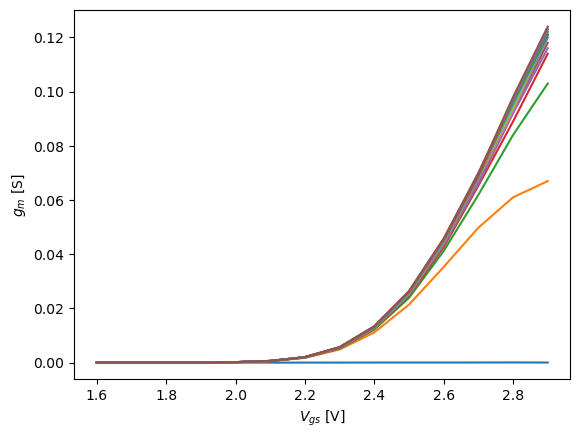

In [13]:
gm_curves = V_gs_I_ds_curves.copy()
    
for _, v in gm_curves.items():
    plt.plot(v[0][1:], np.diff(v[1]) / np.diff(v[0]))
plt.xlabel(r"$V_{gs}$ [V]")
plt.ylabel(r"$g_m$ [S]")
plt.show()